# OBS! Is now a python script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from ast import literal_eval
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [2]:
plt.style.use('ggplot')

# Args

In [3]:
def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("'",""))

converters={'peptide_HLA_lst': peptide_hla_converter, 'cdr3_lst_TRA': cdr3_lst_converter, 'cdr3_lst_TRB': cdr3_lst_converter, 'umi_count_lst_mhc': literal_eval}

In [4]:
EXP = "exp9"

# Input

In [5]:
RAW_FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv"
CLN_FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_TCR/augmented/tcr.clean.augmented.csv"

# Output

In [20]:
directory = 'stats/' + EXP + '/'

# Main

## Load

In [6]:
raw_df = pd.read_csv(RAW_FILE, header=0)
cln_df = pd.read_csv(CLN_FILE, converters=converters)

## Rename

In [7]:
raw_df.rename(columns={"barcode" : "gem"}, inplace=True)
raw_df.rename(columns={"raw_clonotype_id" : "clonotype"}, inplace=True)
raw_df.rename(columns={"umis" : "umi_count"}, inplace=True)
raw_df.rename(columns={"reads" : "read_count"}, inplace=True)

In [8]:
raw_df.replace('None', np.nan, inplace=True)
cln_df.replace('None', np.nan, inplace=True)

## Stats

In [10]:
cln_df.groupby(['cdr3_TRA','cdr3_TRB']).num_clonotype.unique().to_frame().iloc[0:60]

num_clonotype
cdr3_TRA            cdr3_TRB                        
CAAADSSNDYKLSF      CASSLATGRTYGYTF             [13]
CAAAETSYDKVIF       CASRPGLAGVYNEQFF            [41]
CAADVTDSWGKFQF      CASSLSGGSYNEQFF            [369]
CAAEARDNYGQNFVF     CASSWGGTYNEQFF             [345]
CAAENQGGKLIF        CASSERGQGAYEQYF          [10, 0]
CAAFFGNEKLTF        CASSQRGQNTDTQYF            [421]
CAAFRAYNTDKLIF      CASSLIVSGGANEQFF             [0]
                    CASSYRTVSSYEQYF              [0]
                    CASSYTPGSTYEQYF              [0]
                    CSARGLGQAKEYGYTF          [5, 0]
CAAFTGTASKLTF       CASSLRGRLAGVGNEQFF         [503]
CAAFTSGTYKYIF       CASSMGGTPTFSGNTIYF         [499]
CAAGYNFNKFYF        CASSLGPLETHGAQYF           [485]
CAAHHDYNQGGKLIF     CASSLNEQYF                 [124]
CAAIDSNYQLIW        CASSAGSYNEQFF              [175]
CAAIETSYDKVIF       CASSSTGPGNQPQHF             [60]
CAAILGYQKVTF        CASSLGATNEKLFF              [84]
CAAINEGGKLIF        CASSLRGQGYYGYTF             [57]
CAAISGGYNKLIF       CAGGQGFSEAFF                [38]
CAAKGGLNSGYSTLTF    CASSLIVSGGANEQFF             [0]
CAAKYAGGTSYGKLTF    CAIKPRQLNTEAFF             [370]
CAALETSYDKVIF       CASSSGGPGDQPQHF            [426]
CAALMDSSYKLIF       CASTSLTGELFF               [176]
CAALPLSGTYKYIF      CASSTLTGEHLYEQYF           [479]
CAALPLYNFNKFYF      CASRPLQGAPDTQYF            [434]
CAALTHRGNTPLVF      CASSVFAGGPPGELFF           [451]
CAALTSGSRLTF        CASSYSSGELFF               [157]
CAANFGNEKLTF        CASKMGGSTDTQYF             [365]
CAANMDSSYKLIF       CASSFATDGYTF                [49]
CAAPPGYSTLTF        CASSDGSSDTQYF              [182]
CAAPPSGNTPLVF       CASSLVSGGYTEAFF             [90]
CAAQGGKLIF          CASSLSGGGRGAEAFF            [77]
                    CSAVGSWAPNTGELFF            [77]
CAAQTSGSARQLTF      CASSLGSSPYEQYF              [75]
CAARAGSYQLTF        CASSLEYGVRPYEQYF            [99]
CAARDSNYQLIW        CASSDTSGSLGTQYF             [37]
CAARETSYDKVIF       CASSYQGRWEKTQYF            [367]
CAARNPPWGGGSQGNLIF  CSARDLTGNYGYTF             [160]
CAARPGADKLIF        CASSLEASGHPYEQYF           [102]
CAARPGAQKLVF        CASSFRVGGSYNEQFF             [0]
                    CASSLEAGQKPYEQYF          [7, 0]
                    CASSLEGGDRPYEQYF            [62]
                    CASSLERDRPYEQYF          [26, 0]
                    CASSLEWDRPYEQYF            [444]
CAARPNNARLMF        CASSLEFGSRPYEQYF            [18]
                    CASSYTPGSTYEQYF              [0]
CAARPTASKLTF        CASSAEQGVPYEQYF             [42]
CAARVDYKLSF         CASSETGNPTYEQYF             [96]
CAASEGSYIPTF        CASTILPSGTGGHDEQFF         [497]
CAASEPAKIPKAAGNKLTF CSVEVPGKVFRTEAFF             [9]
CAASERGGHTGANSKLTF  CASRSTEPNQPQHF             [371]
CAASKRNTGFQKLVF     CASSLTGSGEGYTF             [248]
CAASPGGFKTIF        CASSSPGSGASEKLFF            [12]
CAASPPMIKAAGNKLTF   CASSPRADNNEQFF             [273]
CAASQNEKLTF         CASRIGAAGNSPLHF           [1, 0]
                    CASRRAGPVPFF                 [0]
                    CASRTGAAGNSPLHF              [0]
                    CASRVQFGVNTGELFF             [0]
                    CASSDLNSPLHF                 [0]
                    CASSEWGGRGGGYEQYF            [0]

In [25]:
raw_df[(raw_df.clonotype == 'clonotype59')].head(60)

,gem,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,read_count,umi_count,clonotype,raw_consensus_id
457,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_1,True,709,TRB,TRBV7-9,NaN,TRBJ2-1,TRBC2,True,True,CASSLVVVDEQFF,TGTGCCAGCAGCTTAGTCGTTGTGGATGAGCAGTTCTTC,38056,33,clonotype59,clonotype59_consensus_2
458,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_2,True,659,TRB,TRBV4-1,NaN,TRBJ1-4,TRBC1,True,True,CASSQGTAEKLFF,TGCGCCAGCAGCCAAGGGACCGCTGAAAAACTGTTTTTT,21481,15,clonotype59,clonotype59_consensus_3
459,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_3,True,508,TRA,TRAV13-1,NaN,TRAJ47,TRAC,True,True,CAASNLVF,TGTGCAGCAAGTAATCTGGTCTTT,19265,13,clonotype59,clonotype59_consensus_1
460,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_4,False,684,TRB,TRBV10-3,TRBD1,TRBJ2-2,TRBC2,True,True,CAIRKQDQNTGELFF,TGTGCCATCAGAAAACAGGACCAAAACACCGGGGAGCTGTTTTTT,4790,4,clonotype59,NaN
461,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_5,False,559,TRA,TRAV22,NaN,TRAJ58,TRAC,True,True,CSNSGSRLTF,TGTTCGAACAGTGGCTCTAGGTTGACCTTT,2822,2,clonotype59,NaN
462,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_6,False,449,TRB,NaN,NaN,TRBJ2-3,TRBC2,False,NaN,NaN,NaN,925,1,clonotype59,NaN
463,CGCGTTTCAATACGCT-1,True,CGCGTTTCAATACGCT-1_contig_7,False,490,TRA,TRAV9-2,NaN,TRAJ10,TRAC,True,True,CALTGGGNKLTF,TGTGCTCTCACGGGAGGAGGAAACAAACTCACCTTT,1402,1,clonotype59,NaN


In [26]:
raw_df[(raw_df.clonotype == 'clonotype2')].head(60)

,gem,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,read_count,umi_count,clonotype,raw_consensus_id
17,AACCATGTCCCATTTA-1,True,AACCATGTCCCATTTA-1_contig_1,True,732,TRB,TRBV7-9,NaN,TRBJ2-1,TRBC2,True,True,CASSLVVVDEQFF,TGTGCCAGCAGCTTAGTCGTTGTGGATGAGCAGTTCTTC,49742,41,clonotype2,clonotype2_consensus_2
18,AACCATGTCCCATTTA-1,True,AACCATGTCCCATTTA-1_contig_2,True,505,TRA,TRAV13-1,NaN,TRAJ47,TRAC,True,True,CAASNLVF,TGTGCAGCAAGTAATCTGGTCTTT,11234,8,clonotype2,clonotype2_consensus_1
19,AACCATGTCCCATTTA-1,True,AACCATGTCCCATTTA-1_contig_3,False,467,TRB,NaN,NaN,TRBJ2-3,TRBC2,False,NaN,NaN,NaN,5002,4,clonotype2,NaN
20,AACCATGTCCCATTTA-1,True,AACCATGTCCCATTTA-1_contig_4,False,435,TRB,NaN,NaN,TRBJ1-6,TRBC1,False,NaN,NaN,NaN,1106,1,clonotype2,NaN
26,AACTCCCGTCAATGTC-1,True,AACTCCCGTCAATGTC-1_contig_1,True,709,TRB,TRBV7-9,NaN,TRBJ2-1,TRBC2,True,True,CASSLVVVDEQFF,TGTGCCAGCAGCTTAGTCGTTGTGGATGAGCAGTTCTTC,31621,30,clonotype2,clonotype2_consensus_2
27,AACTCCCGTCAATGTC-1,True,AACTCCCGTCAATGTC-1_contig_2,True,543,TRA,TRAV13-1,NaN,TRAJ47,TRAC,True,True,CAASNLVF,TGTGCAGCAAGTAATCTGGTCTTT,5043,5,clonotype2,clonotype2_consensus_1
28,AACTCCCGTCAATGTC-1,True,AACTCCCGTCAATGTC-1_contig_3,False,291,TRA,NaN,NaN,NaN,TRAC,False,NaN,NaN,NaN,2101,1,clonotype2,NaN
29,AACTCTTGTTTGCATG-1,True,AACTCTTGTTTGCATG-1_contig_1,True,730,TRB,TRBV7-9,NaN,TRBJ2-1,TRBC2,True,True,CASSLVVVDEQFF,TGTGCCAGCAGCTTAGTCGTTGTGGATGAGCAGTTCTTC,13442,13,clonotype2,clonotype2_consensus_2
30,AACTCTTGTTTGCATG-1,True,AACTCTTGTTTGCATG-1_contig_2,True,514,TRA,TRAV13-1,NaN,TRAJ47,TRAC,True,True,CAASNLVF,TGTGCAGCAAGTAATCTGGTCTTT,3954,3,clonotype2,clonotype2_consensus_1
31,AACTCTTGTTTGCATG-1,True,AACTCTTGTTTGCATG-1_contig_3,True,463,TRB,NaN,NaN,TRBJ2-3,TRBC2,False,NaN,NaN,NaN,3229,3,clonotype2,NaN


### Percent NA

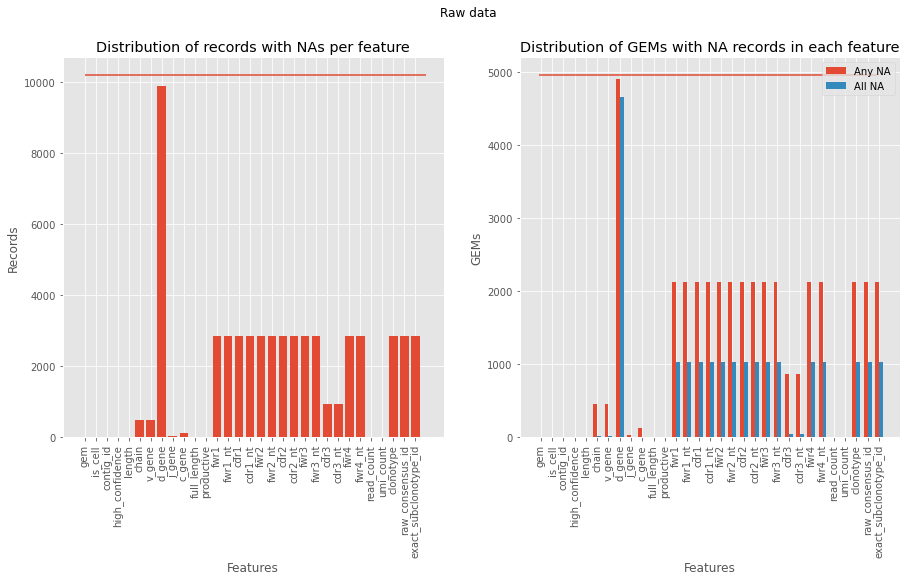

In [11]:
plt.figure(figsize=(15,7))

# Distribution of records with NAs per feature
plt.subplot(1,2,1)

x = raw_df.isnull().sum().index
y = raw_df.isnull().sum()
plt.bar(x,y)
plt.tick_params(axis='x', labelrotation=90)

plt.hlines(raw_df.shape[0], 0, len(raw_df.columns))

plt.title("Distribution of records with NAs per feature")
plt.xlabel("Features")
plt.ylabel("Records")

# Distribution of GEMs with NA records in each feature
plt.subplot(1,2,2)
    
ind = np.arange(len(raw_df.columns))
width = 0.35

y = raw_df.groupby('gem').apply(lambda x: x.isnull().any()).sum()
plt.bar(ind, y, width, label='Any NA')

y = raw_df.groupby('gem').apply(lambda x: x.isnull().all()).sum()
plt.bar(ind+width, y, width, label='All NA')

plt.hlines(raw_df.gem.unique().shape[0], min(ind), max(ind))

x = raw_df.groupby('gem').apply(lambda x: x.isnull().any()).sum().index
plt.xticks(ind + width / 2, x)
plt.tick_params(axis='x', labelrotation=90)
plt.legend(loc='best')

plt.title("Distribution of GEMs with NA records in each feature")
plt.xlabel("Features")
plt.ylabel("GEMs")
    
plt.suptitle("Raw data")
plt.show()

### Venn of is_cell, full_length, productive

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


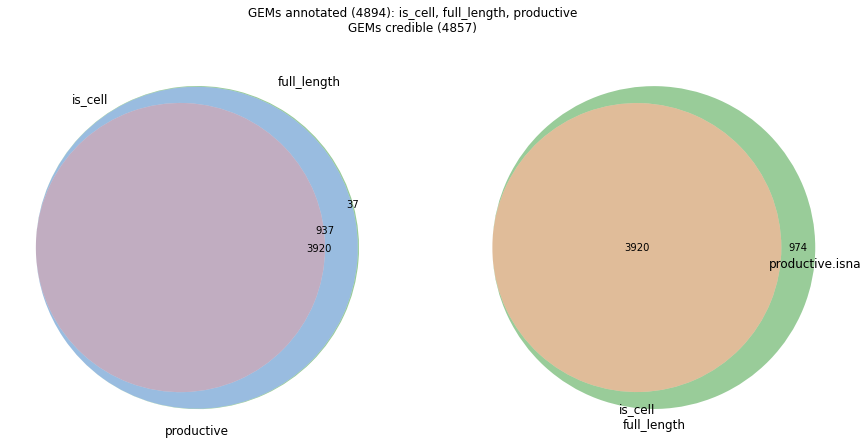

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
a, b, c = set(raw_df[raw_df.is_cell == True].gem), set(raw_df[raw_df.full_length == True].gem), set(raw_df[raw_df.productive == True].gem), 
ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)
abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('is_cell', 'full_length', 'productive'))
#plt.title('GEMs annotated: is_cell, full_length, productive')

venn_total = (a_bc + b_ac + ab_c + c_ab + ac_b + bc_a + abc)
venn_total = set.union(a,b,c)
venn_credible = bc

plt.subplot(1,2,2)
a, b, c = set(raw_df[raw_df.is_cell == True].gem), set(raw_df[raw_df.full_length == True].gem), set(raw_df[raw_df.productive.isnull()].gem), 
ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)
abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('is_cell', 'full_length', 'productive.isna'))
plt.suptitle('GEMs annotated (%i): is_cell, full_length, productive\nGEMs credible (%i)' %(len(venn_total.union(a,b,c)), len(venn_credible))) # + c_ab
#plt.savefig(directory + "venn_iscell_fulllength_productive.pdf", bbox_inches='tight')
plt.show()

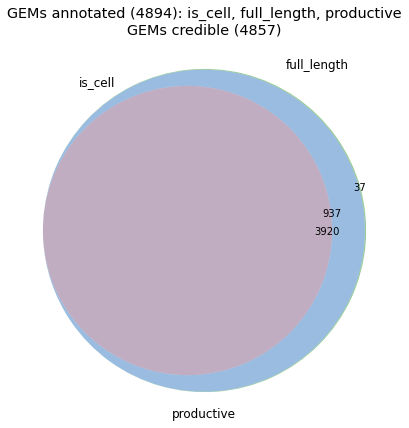

In [14]:
plt.figure(figsize=(15,7))
a, b, c = set(raw_df[raw_df.is_cell == True].gem), set(raw_df[raw_df.full_length == True].gem), set(raw_df[raw_df.productive == True].gem), 
ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)
abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('is_cell', 'full_length', 'productive'))
plt.title('GEMs annotated: is_cell, full_length, productive')
plt.title('GEMs annotated (%i): is_cell, full_length, productive\nGEMs credible (%i)' %(len(a.union(b,c)), len(bc))) # + c_ab
#plt.savefig(directory + "venn_iscell_fulllength_productive.pdf", bbox_inches='tight')


plt.show()

In [16]:
raw_df[raw_df.is_cell == True].clonotype.isna().any()

True

### Distribution of contig lengths and read and UMI count

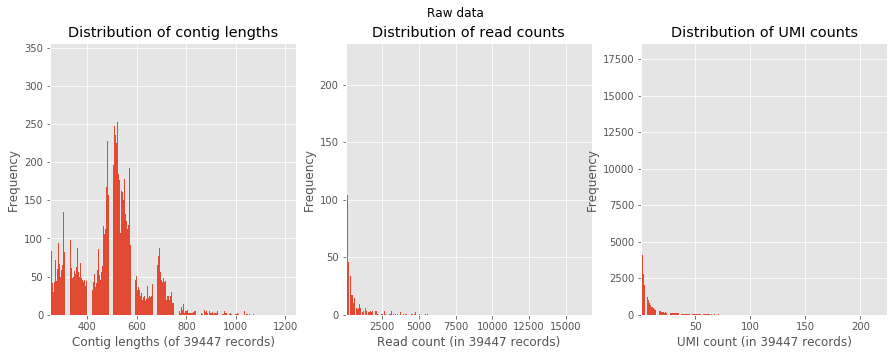

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
x = raw_df.groupby('length').size().index
y = raw_df.groupby('length').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('Contig lengths (of %i records)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of contig lengths')

plt.subplot(1,3,2)
x = raw_df.groupby('read_count').size().index
y = raw_df.groupby('read_count').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('Read count (in %i records)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of read counts')

plt.subplot(1,3,3)
x = raw_df.groupby('umi_count').size().index
y = raw_df.groupby('umi_count').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('UMI count (in %i records)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of UMI counts')

plt.suptitle("Raw data")
plt.show()

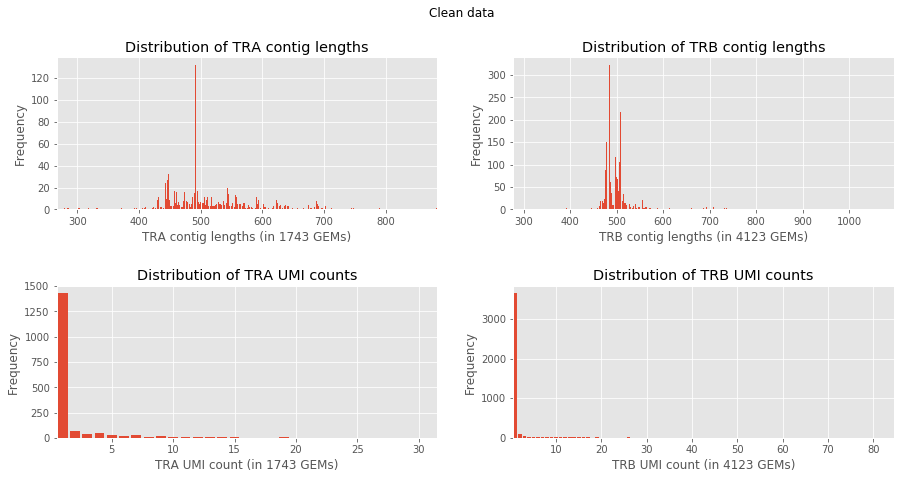

In [11]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
x = cln_df.groupby('length_TRA').size().index
y = cln_df.groupby('length_TRA').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('TRA contig lengths (in %i GEMs)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of TRA contig lengths')

plt.subplot(2,2,2)
x = cln_df.groupby('length_TRB').size().index
y = cln_df.groupby('length_TRB').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('TRB contig lengths (in %i GEMs)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of TRB contig lengths')

plt.subplot(2,2,3)
x = cln_df.groupby('umi_count_TRA').size().index
y = cln_df.groupby('umi_count_TRA').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('TRA UMI count (in %i GEMs)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of TRA UMI counts')

plt.subplot(2,2,4)
x = cln_df.groupby('umi_count_TRB').size().index
y = cln_df.groupby('umi_count_TRB').size()
plt.bar(x,y)
plt.xlim((min(x)-0.5, max(x)+0.5))
plt.xlabel('TRB UMI count (in %i GEMs)' %sum(y))
plt.ylabel('Frequency')
plt.title('Distribution of TRB UMI counts')

plt.subplots_adjust(hspace = 0.5)
plt.suptitle('Clean data')
plt.savefig(directory + "cln_contig_length_distr.pdf")
plt.show()

### Venn of TRA and TRB

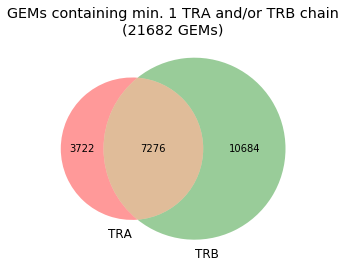

In [25]:
gem_tra = cln_df[cln_df.cdr3_TRA.notnull()].gem
gem_trb = cln_df[cln_df.cdr3_TRB.notnull()].gem

a, b = set(gem_tra), set(gem_trb)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "GEMs containing min. 1 TRA and/or TRB chain\n(%i GEMs)" %(a_b+b_a+ab)
venn2(subsets = (a_b, b_a, ab), set_labels = ('TRA', 'TRB'))
plt.title(title)
plt.savefig(directory + 'venn_tra_trb.pdf', bbox_inches='tight')
plt.show()

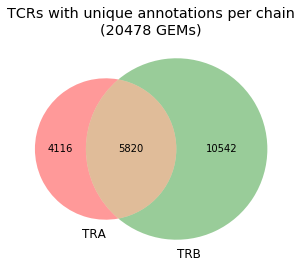

In [26]:
gem_tra = cln_df[(cln_df.cdr3_TRA.notnull()) & (cln_df.single_TRA == True)].gem
gem_trb = cln_df[(cln_df.cdr3_TRB.notnull()) & (cln_df.single_TRB == True)].gem

a, b = set(gem_tra), set(gem_trb)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = 'TCRs with unique annotations per chain\n(%i GEMs)' %(a_b+b_a+ab)
venn2(subsets = (a_b, b_a, ab), set_labels = ('TRA', 'TRB'))
plt.title(title)
plt.savefig(directory + 'venn_tra_trb_unique_annotations.pdf', bbox_inches='tight')
plt.show()

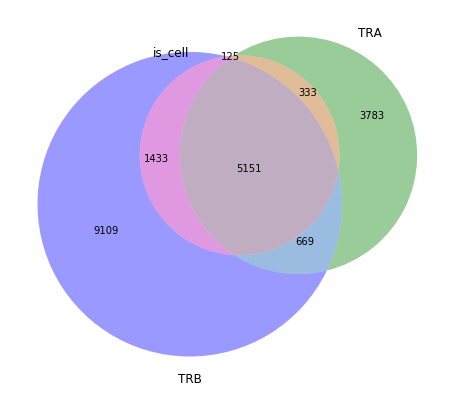

In [27]:
plt.figure(figsize=(15,7))

gem_tra = cln_df[(cln_df.cdr3_TRA.notnull()) & (cln_df.single_TRA == True)].gem
gem_trb = cln_df[(cln_df.cdr3_TRB.notnull()) & (cln_df.single_TRB == True)].gem

a, b, c = set(raw_df[raw_df.is_cell == True].gem), set(gem_tra), set(gem_trb), 
ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)
abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('is_cell', 'TRA', 'TRB'))

plt.show()

### Distribution of TCRs (GEMs per clonotype)

In [14]:
raw_df.columns.to_list()

['gem',
 'is_cell',
 'contig_id',
 'high_confidence',
 'length',
 'chain',
 'v_gene',
 'd_gene',
 'j_gene',
 'c_gene',
 'full_length',
 'productive',
 'cdr3',
 'cdr3_nt',
 'read_count',
 'umi_count',
 'clonotype',
 'raw_consensus_id']

In [21]:
cln_df

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,cdr3_lst_TRA,chain_count_TRA,...,cdr3_TRB,umi_count_TRB,umi_count_lst_TRB,cdr3_lst_TRB,chain_count_TRB,single_TRB,single_chain_only,single_tcell,umi_count_tcr,cdr3_comb
0,AAACCTGAGTAGATGT-1,clonotype22,22,142,588.0,CAYRSANFGNEKLTF,11.0,[11],['CAYRSANFGNEKLTF'],1.0,...,CASSDAGTGYQPQHF,5.0,[5],['CASSDAGTGYQPQHF'],1.0,True,False,True,16.0,CAYRSANFGNEKLTFCASSDAGTGYQPQHF
1,AAACCTGTCTCGAGTA-1,clonotype23,23,193,696.0,CAVKAGSYIPTF,4.0,[1 4],['CAENAANSGYALNF' 'CAVKAGSYIPTF'],2.0,...,CATSDSPPGDGTQYF,19.0,[19],['CATSDSPPGDGTQYF'],1.0,True,False,True,23.0,CAVKAGSYIPTFCATSDSPPGDGTQYF
2,AAACGGGAGCTCCTTC-1,NaN,0,5,447.0,CAASNLVF,1.0,[1],['CAASNLVF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1.0,CAASNLVF
3,AAACGGGCATCGATGT-1,NaN,0,3,492.0,CALTGGGNKLTF,1.0,[1],['CALTGGGNKLTF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1.0,CALTGGGNKLTF
4,AAACGGGTCTTGCCGT-1,NaN,0,5,486.0,CAASNLVF,1.0,[1],['CAASNLVF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1.0,CAASNLVF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,TTTGTCACAGCTGTTA-1,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,CAIRKQDQNTGELFF,1.0,[1],['CAIRKQDQNTGELFF'],1.0,True,True,False,1.0,CAIRKQDQNTGELFF
5419,TTTGTCAGTCTTGATG-1,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,CAIRKQDQNTGELFF,1.0,[1],['CAIRKQDQNTGELFF'],1.0,True,True,False,1.0,CAIRKQDQNTGELFF
5420,TTTGTCAGTGAAAGAG-1,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,CAIRKQDQNTGELFF,1.0,[1],['CAIRKQDQNTGELFF'],1.0,True,True,False,1.0,CAIRKQDQNTGELFF
5421,TTTGTCAGTGCAACGA-1,NaN,0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,CASSLVVVDEQFF,1.0,[1],['CASSLVVVDEQFF'],1.0,True,True,False,1.0,CASSLVVVDEQFF


                gem                                          cdr3_comb
num_clonotype                                                         
0              5061  [CAASNLVF, CALTGGGNKLTF, CVVNNARLMF, CSNSGSRLT...
1                67  [CALTGGGNKLTFCAIRKQDQNTGELFF, CVVNNARLMFCAIRKQ...
2                57                            [CAASNLVFCASSLVVVDEQFF]
3                35  [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF, CAVRAPMDSSYK...
4                24                      [CALTGGGNKLTFCAIRKQDQNTGELFF]
5                17                          [CSNSGSRLTFCASSQGTAEKLFF]
     gem          cdr3_comb
ct                         
1   1661  [CAIRKQDQNTGELFF]
2   1029    [CASSLVVVDEQFF]
3    457     [CALTGGGNKLTF]
4    446    [CASSQGTAEKLFF]
5    386         [CAASNLVF]
6    223       [CVVNNARLMF]


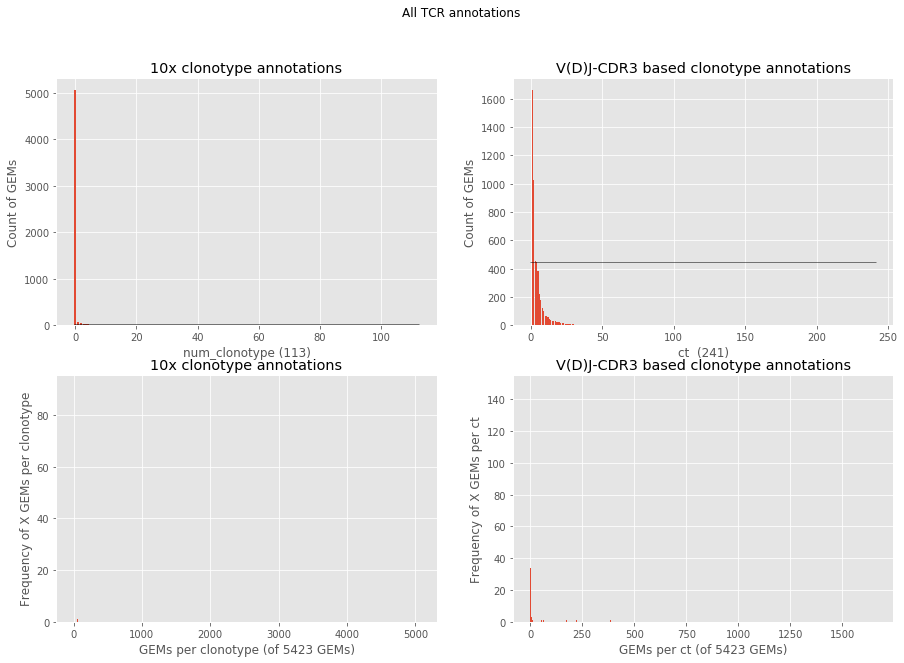

               gem                                          cdr3_comb
num_clonotype                                                        
0              114  [CAASNLVF, CALTGGGNKLTF, CVVNNARLMF, CSNSGSRLT...
1               67  [CALTGGGNKLTFCAIRKQDQNTGELFF, CVVNNARLMFCAIRKQ...
2               57                            [CAASNLVFCASSLVVVDEQFF]
3               35  [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF, CAVRAPMDSSYK...
4               24                      [CALTGGGNKLTFCAIRKQDQNTGELFF]
5               17                          [CSNSGSRLTFCASSQGTAEKLFF]
    gem                           cdr3_comb
ct                                         
9    99       [CALTGGGNKLTFCAIRKQDQNTGELFF]
10   65             [CAASNLVFCASSLVVVDEQFF]
14   35   [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF]
16   28         [CVVNNARLMFCAIRKQDQNTGELFF]
19   20  [CAVRAPMDSSYKLIFCASSSHDWGGQGSPLHF]
20   20           [CSNSGSRLTFCASSQGTAEKLFF]


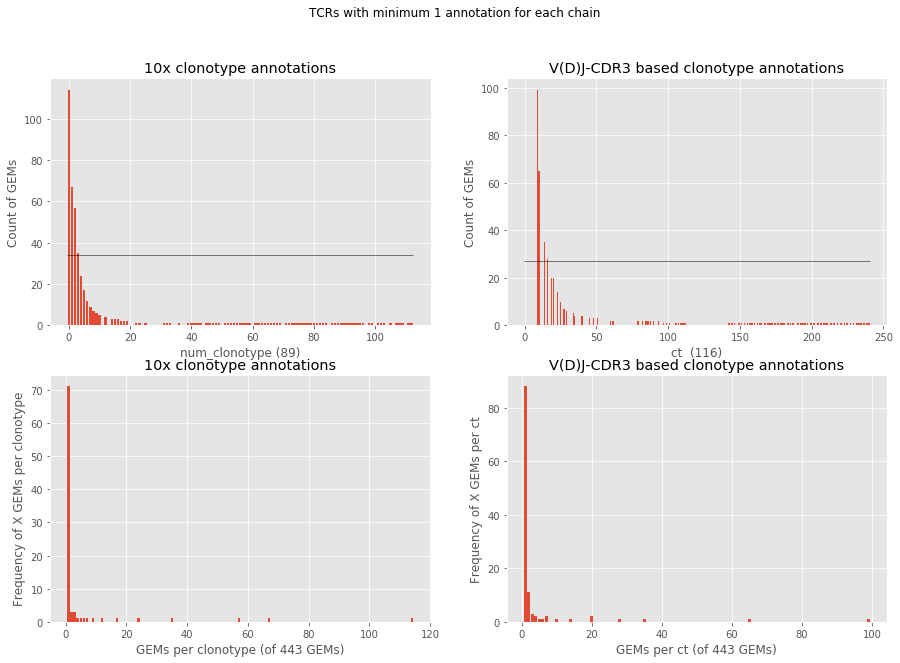

               gem                                          cdr3_comb
num_clonotype                                                        
0              110  [CAASNLVF, CALTGGGNKLTF, CVVNNARLMF, CSNSGSRLT...
2               49                            [CAASNLVFCASSLVVVDEQFF]
3               28  [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF, CAVRAPMDSSYK...
4               10                      [CALTGGGNKLTFCAIRKQDQNTGELFF]
5               14                          [CSNSGSRLTFCASSQGTAEKLFF]
9                5               [CALRAGQDSSYKLIFCASSLLVGPGTGKYNEQFF]
    gem                          cdr3_comb
ct                                        
9    29      [CALTGGGNKLTFCAIRKQDQNTGELFF]
10   56            [CAASNLVFCASSLVVVDEQFF]
14   29  [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF]
16   10        [CVVNNARLMFCAIRKQDQNTGELFF]
20   15          [CSNSGSRLTFCASSQGTAEKLFF]
23   13        [CALTGGGNKLTFCASSLVVVDEQFF]


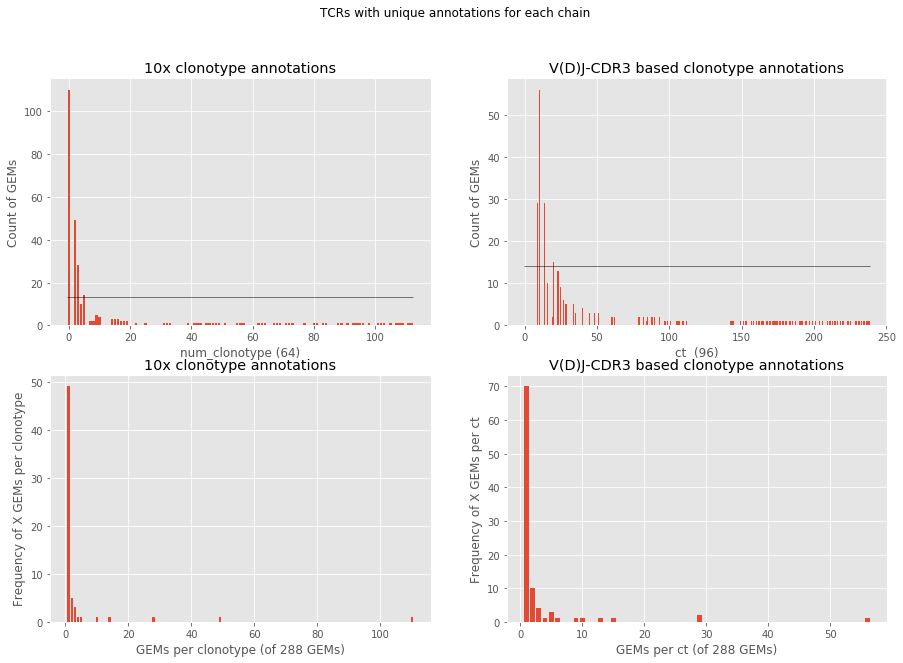

               gem                                          cdr3_comb
num_clonotype                                                        
2               49                            [CAASNLVFCASSLVVVDEQFF]
3               28  [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF, CAVRAPMDSSYK...
4               10                      [CALTGGGNKLTFCAIRKQDQNTGELFF]
5               14                          [CSNSGSRLTFCASSQGTAEKLFF]
9                5               [CALRAGQDSSYKLIFCASSLLVGPGTGKYNEQFF]
10               4                  [CAETAGYGGSQGNLIFCASSRTSGANNEQFF]
    gem                             cdr3_comb
ct                                           
9    11         [CALTGGGNKLTFCAIRKQDQNTGELFF]
10   49               [CAASNLVFCASSLVVVDEQFF]
14   28     [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF]
20   14             [CSNSGSRLTFCASSQGTAEKLFF]
27    5  [CALRAGQDSSYKLIFCASSLLVGPGTGKYNEQFF]
29    4     [CAETAGYGGSQGNLIFCASSRTSGANNEQFF]


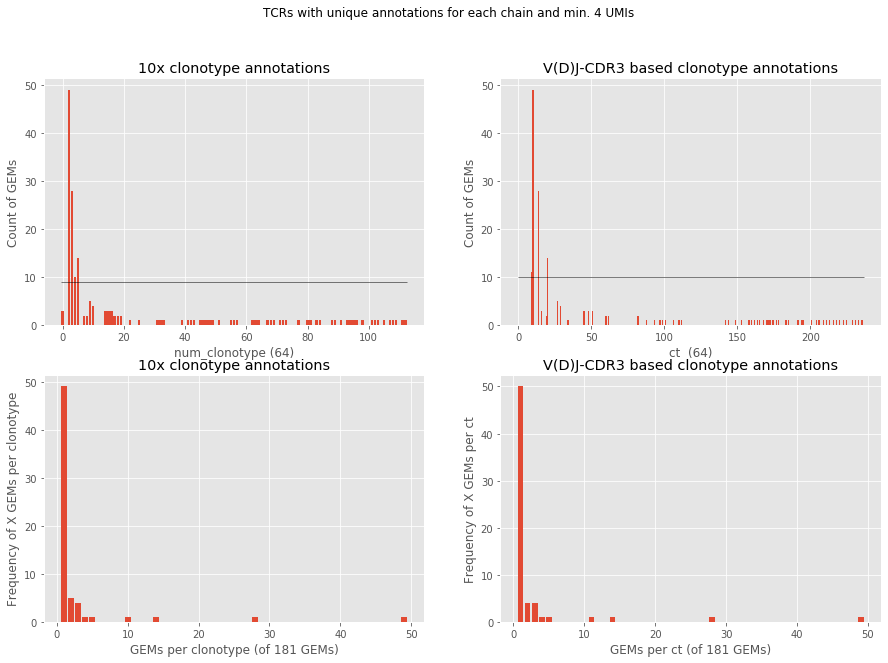

               gem                                          cdr3_comb
num_clonotype                                                        
1               67  [CALTGGGNKLTFCAIRKQDQNTGELFF, CVVNNARLMFCAIRKQ...
2               57                            [CAASNLVFCASSLVVVDEQFF]
3               35  [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF, CAVRAPMDSSYK...
4               24                      [CALTGGGNKLTFCAIRKQDQNTGELFF]
5               17                          [CSNSGSRLTFCASSQGTAEKLFF]
6               12  [CVVSGFQKLVFCASSSHDWGGQGSPLHF, CAVRAPMDSSYKLIF...
    gem                           cdr3_comb
ct                                         
9    80       [CALTGGGNKLTFCAIRKQDQNTGELFF]
10   58             [CAASNLVFCASSLVVVDEQFF]
14   34   [CATVLRMDSSYKLIFCASSQIGEGHGDEQFF]
16   21         [CVVNNARLMFCAIRKQDQNTGELFF]
19   20  [CAVRAPMDSSYKLIFCASSSHDWGGQGSPLHF]
20   19           [CSNSGSRLTFCASSQGTAEKLFF]


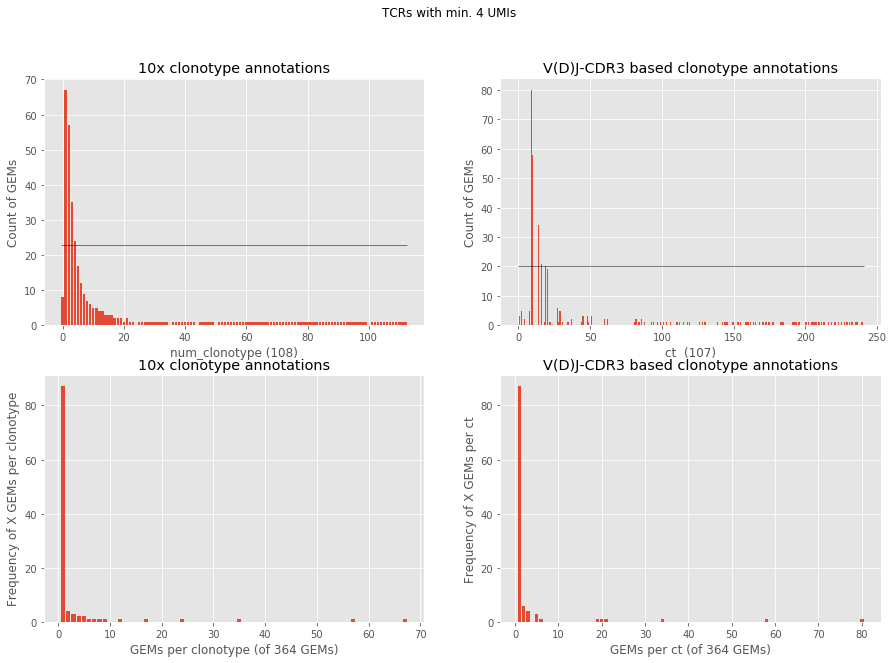

In [19]:
for df, title in [(cln_df, 'All TCR annotations'),
                  (cln_df[cln_df.single_chain_only == False], 'TCRs with minimum 1 annotation for each chain'),
                  (cln_df[(cln_df.single_chain_only == False) &
                          (cln_df.single_TRA == True) &
                          (cln_df.single_TRB == True)], 'TCRs with unique annotations for each chain'),
                  (cln_df[(cln_df.single_chain_only == False) &
                          (cln_df.single_TRA == True) &
                          (cln_df.single_TRB == True) &
                          (cln_df.umi_count_tcr >= 4)], 'TCRs with unique annotations for each chain and min. 4 UMIs'),
                 (cln_df[(cln_df.umi_count_tcr >= 4)], 'TCRs with min. 4 UMIs')]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    x = df.groupby('num_clonotype').gem.size().index
    y = df.groupby('num_clonotype').gem.size()
    plt.bar(x,y)
    plt.hlines(sorted(y, reverse=True)[3]-1, -0.5, max(x)+0.5, linewidth=0.5)
    plt.xlabel('num_clonotype (%i)' %len(x))
    plt.ylabel('Count of GEMs')
    plt.title('10x clonotype annotations')
    #plt.xlim((-0.5, max(x)+0.5))
    
    top_clonotypes = y[y.isin(sorted(y, reverse=True)[:6])]
    top_cdr3s = cln_df[cln_df.num_clonotype.isin(top_clonotypes.index)].groupby('num_clonotype').cdr3_comb.unique()
    print(pd.concat([top_clonotypes, top_cdr3s], axis=1))
    
    plt.subplot(2,2,2)
    x = df.groupby('ct').gem.size().index
    y = df.groupby('ct').gem.size()
    plt.bar(x,y)
    plt.hlines(sorted(y, reverse=True)[3]-1, -0.5, max(x)+0.5, linewidth=0.5)
    plt.xlabel('ct  (%i)'  %len(x))
    plt.ylabel('Count of GEMs')
    plt.title('V(D)J-CDR3 based clonotype annotations')
    #plt.xlim((-0.5, max(x)+0.5))
    
    top_clonotypes = y[y.isin(sorted(y, reverse=True)[:6])]
    top_cdr3s = cln_df[cln_df.ct.isin(top_clonotypes.index)].groupby('ct').cdr3_comb.unique()
    print(pd.concat([top_clonotypes, top_cdr3s], axis=1))
    
    plt.subplot(2,2,3)
    x = df.groupby('num_clonotype').gem.size().value_counts().index
    y = df.groupby('num_clonotype').gem.size().value_counts()
    plt.bar(x,y)
    plt.xlabel('GEMs per clonotype (of %i GEMs)' %sum(x*y))
    plt.ylabel('Frequency of X GEMs per clonotype')
    plt.title('10x clonotype annotations')
    #plt.xlim((-0.5, max(x)+0.5))

    plt.subplot(2,2,4)
    x = df.groupby('ct').gem.size().value_counts().index
    y = df.groupby('ct').gem.size().value_counts()
    plt.bar(x,y)
    plt.xlabel('GEMs per ct (of %i GEMs)'  %sum(x*y))
    plt.ylabel('Frequency of X GEMs per ct')
    plt.title('V(D)J-CDR3 based clonotype annotations')

    plt.suptitle(title)
    plt.show()
    

### Distribution of TCRs with unique annotations for each chain (varying number of UMIs)

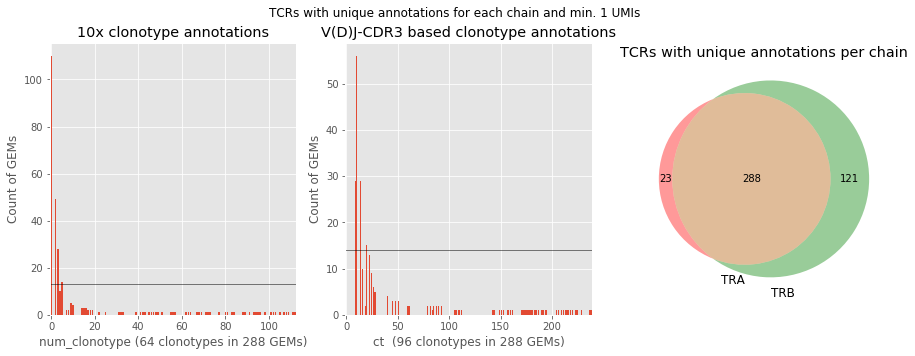

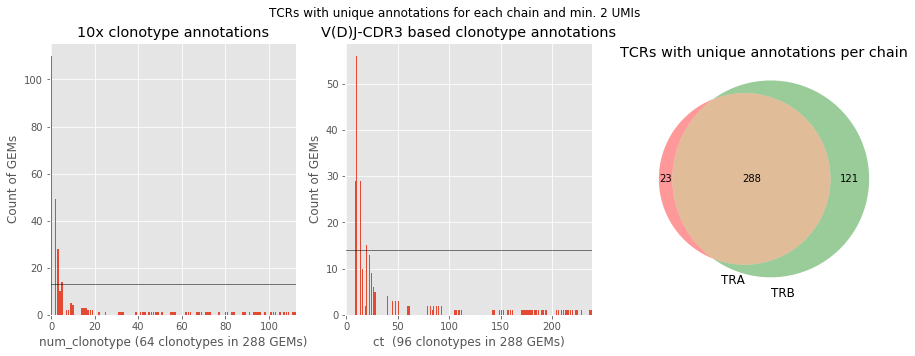

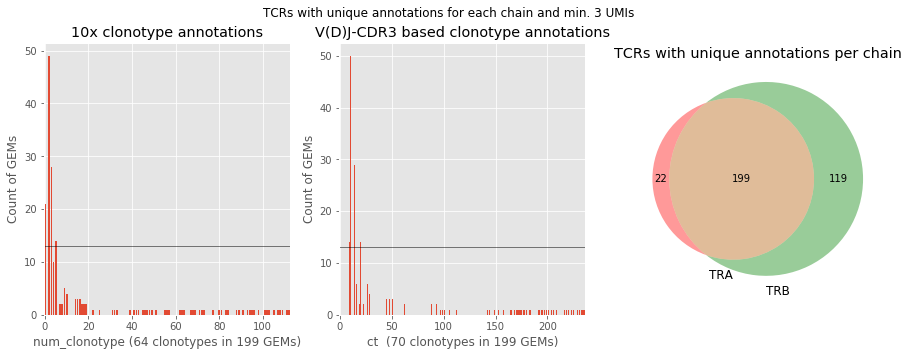

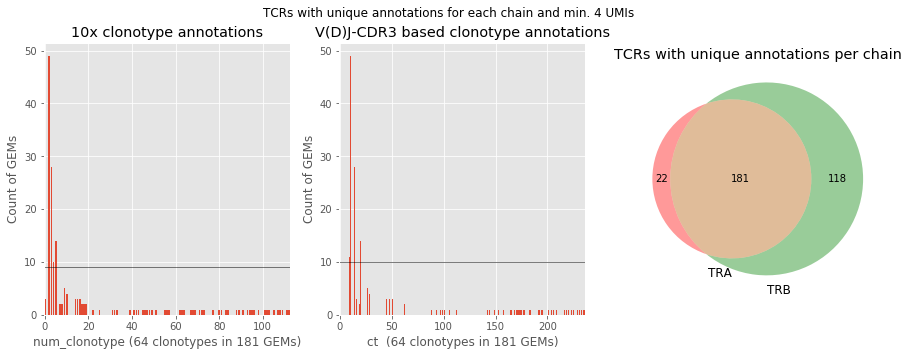

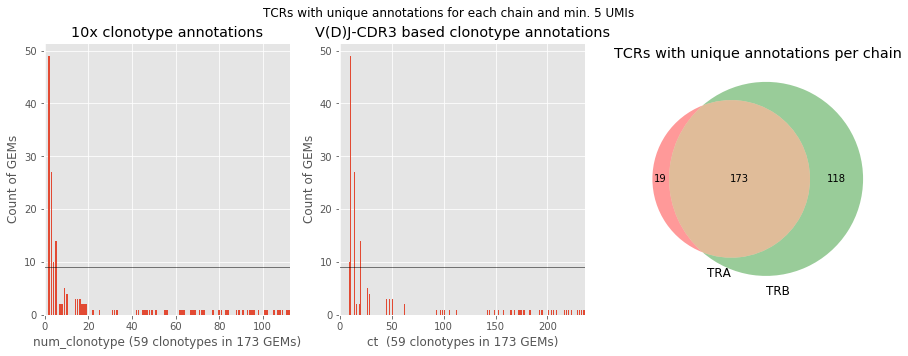

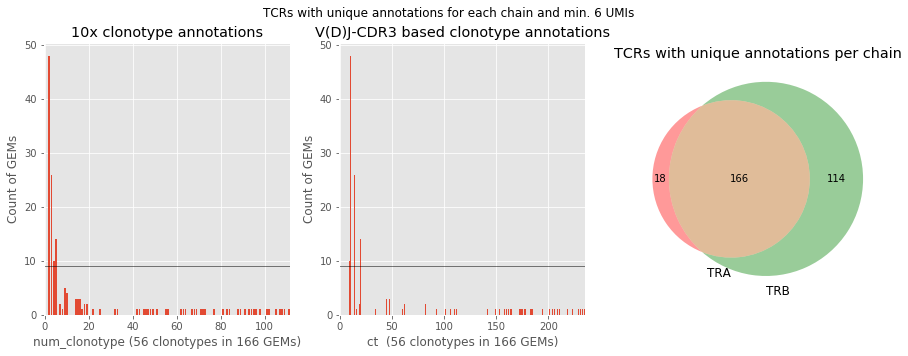

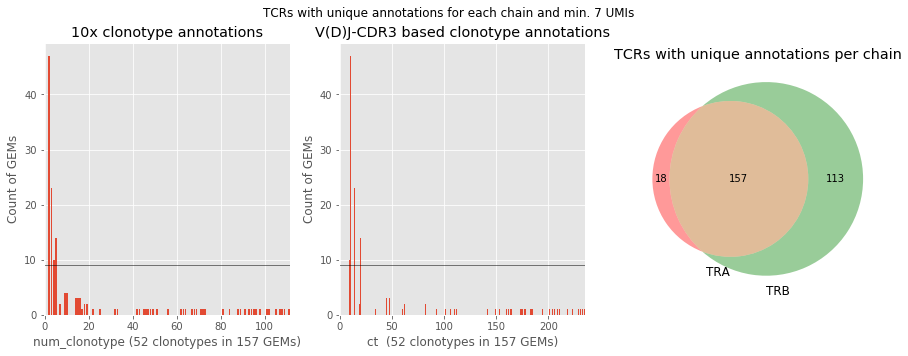

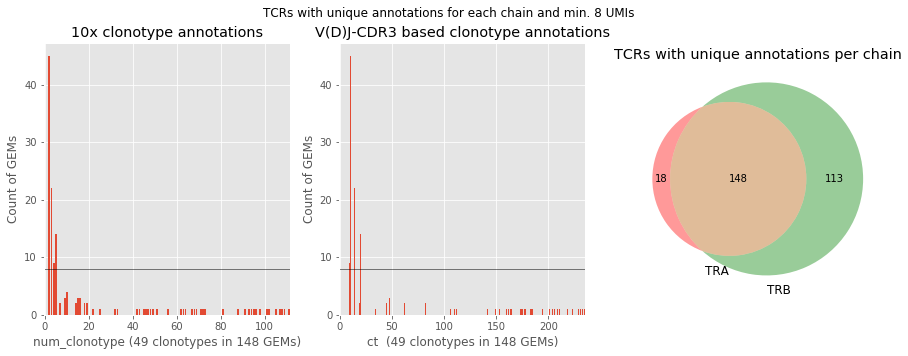

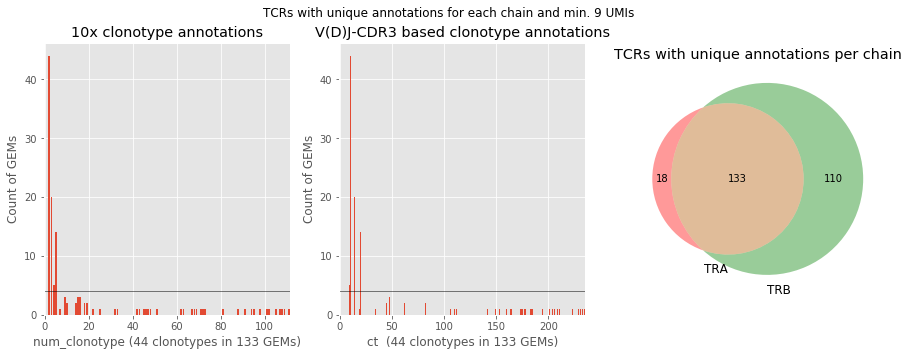

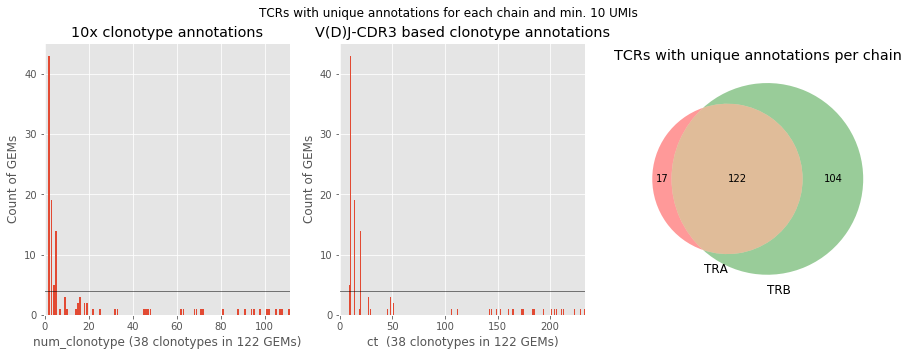

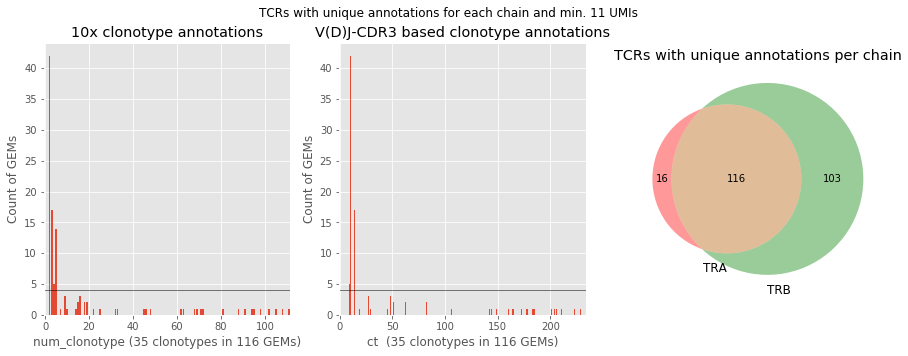

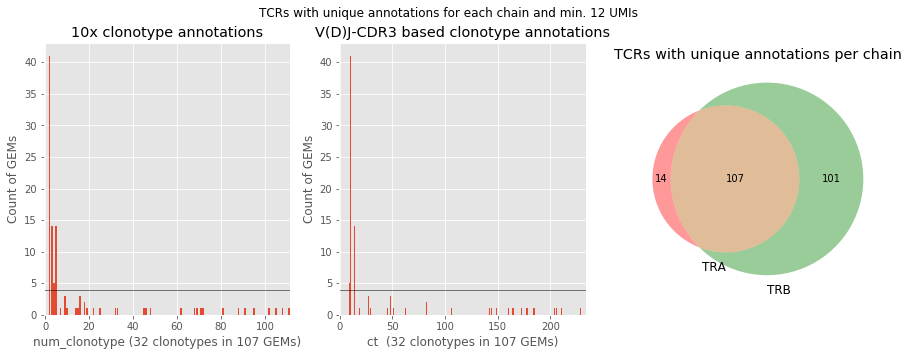

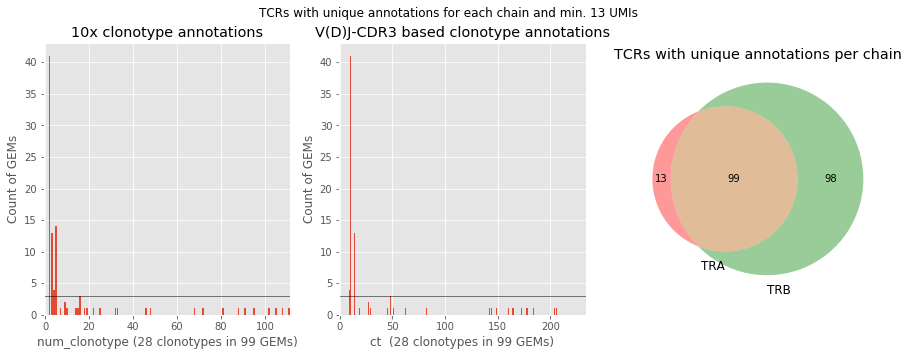

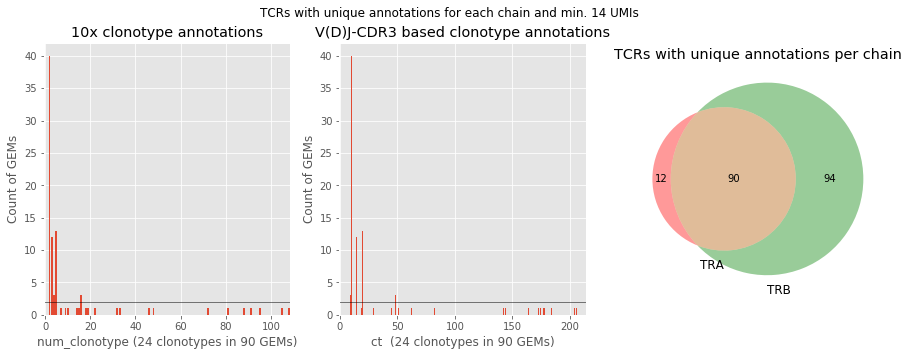

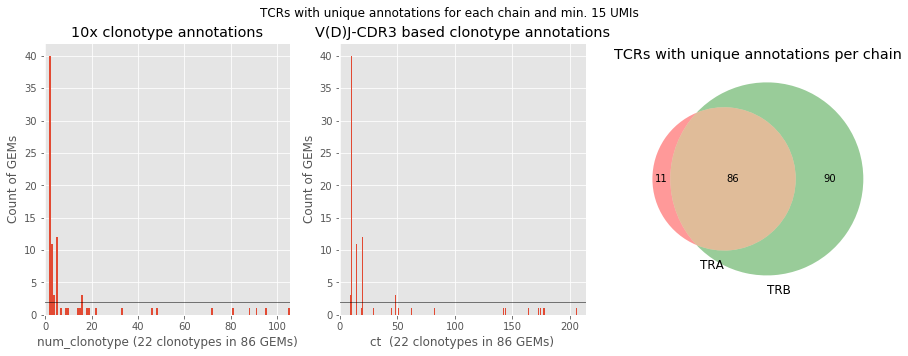

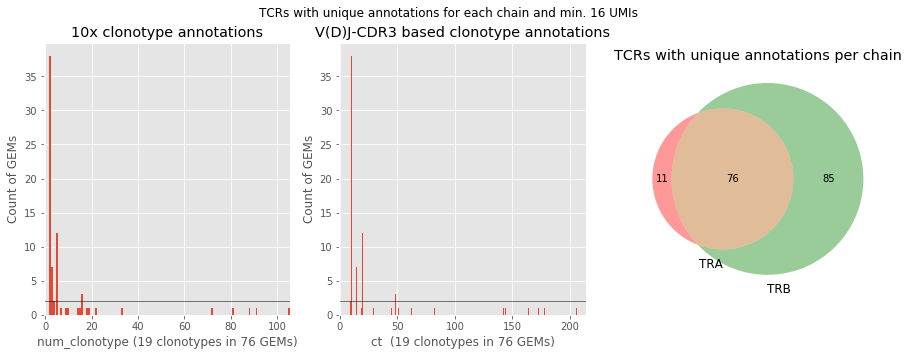

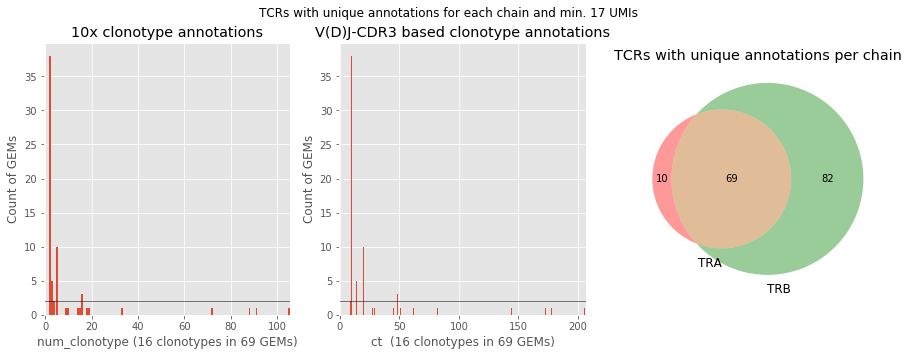

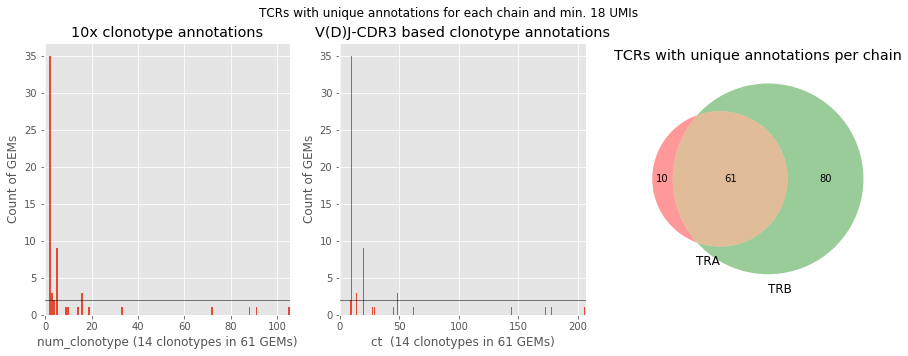

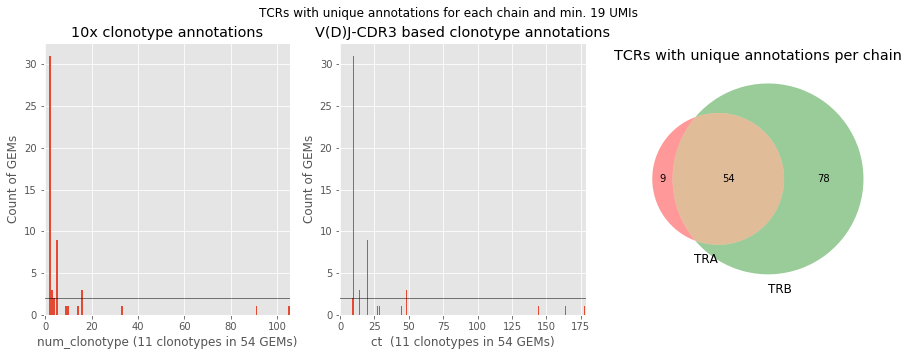

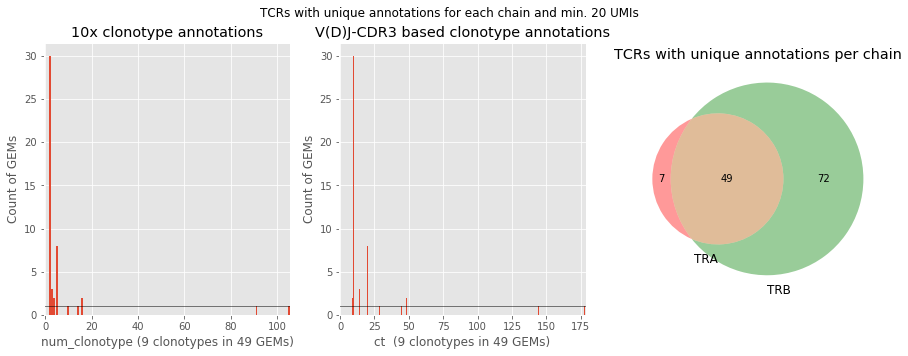

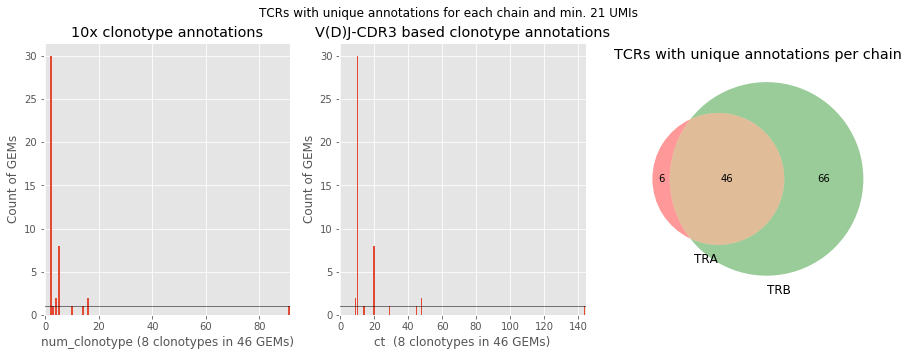

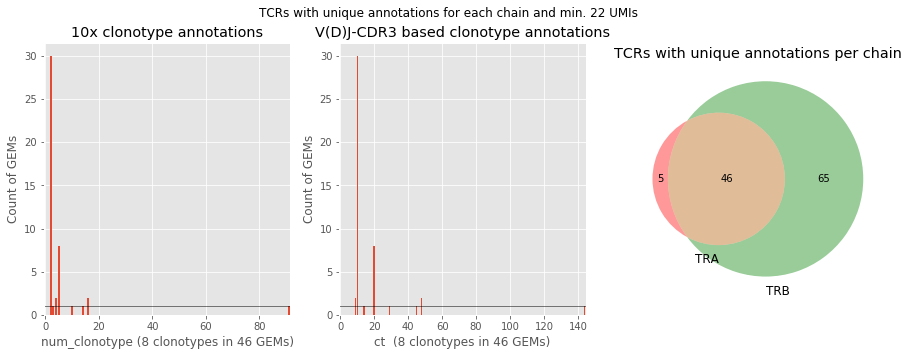

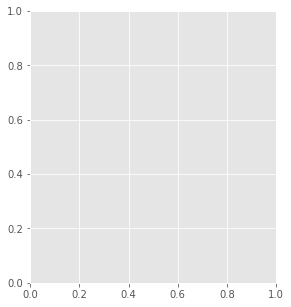

In [19]:
df = cln_df[(cln_df.single_chain_only == False) &
            (cln_df.single_TRA == True) &
            (cln_df.single_TRB == True)]
df_a = cln_df[(cln_df.single_chain_only == False) & (cln_df.cdr3_TRA.notnull()) & (cln_df.single_TRA == True)]
df_b = cln_df[(cln_df.single_chain_only == False) & (cln_df.cdr3_TRB.notnull()) & (cln_df.single_TRB == True)]

for umi in range(1, int(max(cln_df.umi_count_tcr))):
    df = df[df.umi_count_tcr >= umi]
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    x = df.groupby('num_clonotype').gem.size().index
    y = df.groupby('num_clonotype').gem.size()
    if sorted(y, reverse=True)[3]-1 == 0:
        break
    plt.bar(x,y)
    plt.hlines(sorted(y, reverse=True)[3]-1, -0.5, max(x)+0.5, linewidth=0.5)
    plt.xlabel('num_clonotype (%i clonotypes in %i GEMs)' %(len(x), sum(y)))
    plt.ylabel('Count of GEMs')
    plt.title('10x clonotype annotations')
    plt.xlim((-0.5, max(x)+0.5))

    plt.subplot(1,3,2)
    x = df.groupby('ct').gem.size().index
    y = df.groupby('ct').gem.size()
    if sorted(y, reverse=True)[3]-1 == 0:
        break
    plt.bar(x,y)
    plt.hlines(sorted(y, reverse=True)[3]-1, -0.5, max(x)+0.5, linewidth=0.5)
    plt.xlabel('ct  (%i clonotypes in %i GEMs)'  %(len(x), sum(y)))
    plt.ylabel('Count of GEMs')
    plt.title('V(D)J-CDR3 based clonotype annotations')
    plt.xlim((-0.5, max(x)+0.5))
    
    plt.subplot(1,3,3)
    gem_tra = df_a[df_a.umi_count_tcr >= umi].gem
    gem_trb = df_b[df_b.umi_count_tcr >= umi].gem
    a, b = set(gem_tra), set(gem_trb)
    ab = len(a.intersection(b))
    a_b = len(a) - ab
    b_a = len(b) - ab
    venn2(subsets = (a_b, b_a, ab), set_labels = ('TRA', 'TRB'))
    plt.title('TCRs with unique annotations per chain')
    

    plt.suptitle('TCRs with unique annotations for each chain and min. %i UMIs' %umi)
    plt.show()

### Distribution of unique number of V(D)J-CDR3 annotations per clonotype

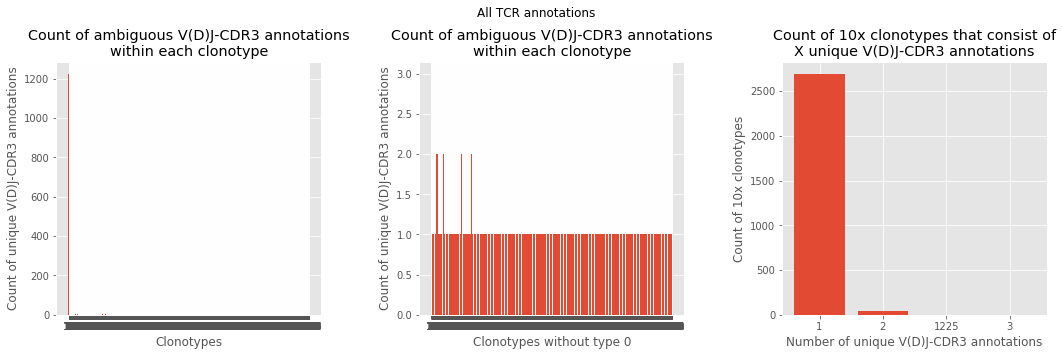

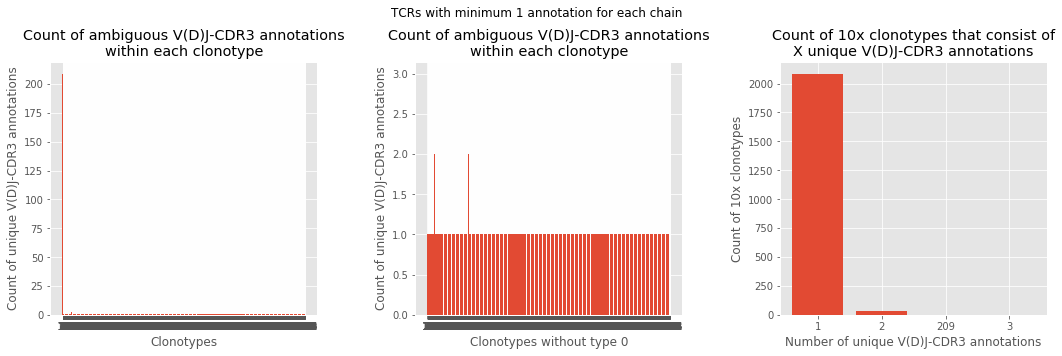

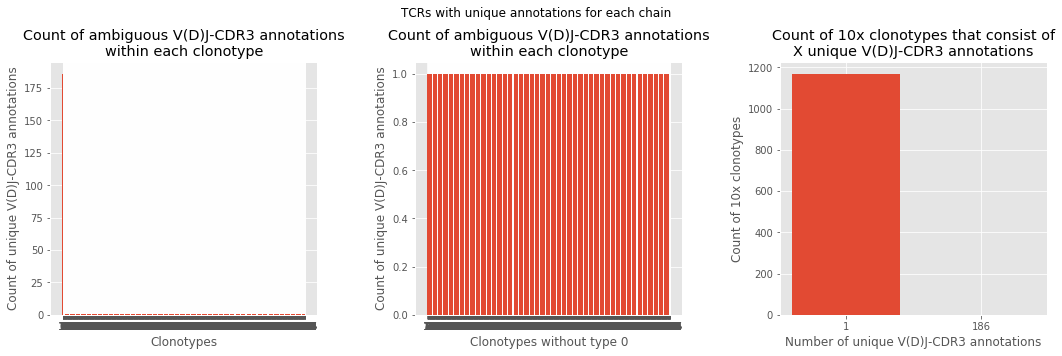

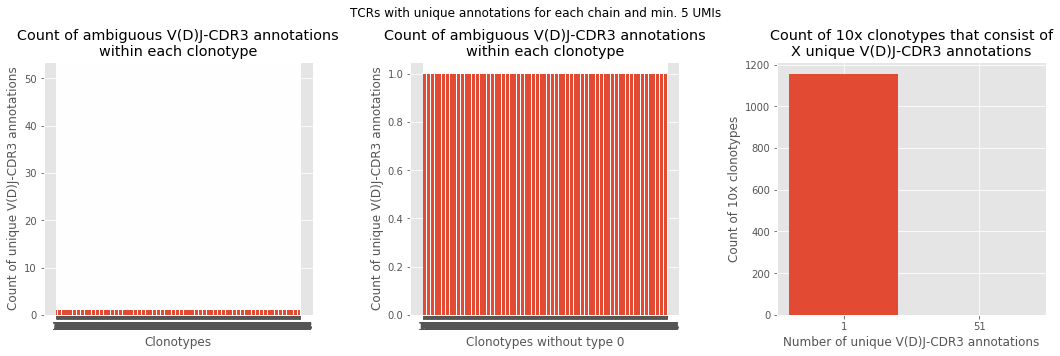

In [60]:
for df, title in [(cln_df, 'All TCR annotations'),
                  (cln_df[cln_df.single_chain_only == False], 'TCRs with minimum 1 annotation for each chain'),
                  (cln_df[(cln_df.single_chain_only == False) &
                          (cln_df.single_TRA == True) &
                          (cln_df.single_TRB == True)], 'TCRs with unique annotations for each chain'),
                  (cln_df[(cln_df.single_chain_only == False) &
                          (cln_df.single_TRA == True) &
                          (cln_df.single_TRB == True) &
                          (cln_df.umi_count_tcr >= 5)], 'TCRs with unique annotations for each chain and min. 5 UMIs')]:
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    x = df.groupby('num_clonotype').ct.apply(lambda x: len(np.unique(x))).index.astype(str)
    y = df.groupby('num_clonotype').ct.apply(lambda x: len(np.unique(x)))
    plt.bar(x,y)
    plt.xlabel('Clonotypes')
    plt.ylabel('Count of unique V(D)J-CDR3 annotations')
    plt.title('Count of ambiguous V(D)J-CDR3 annotations\nwithin each clonotype')

    plt.subplot(1,3,2)
    x = df[df.num_clonotype != 0].groupby('num_clonotype').ct.apply(lambda x: len(np.unique(x))).index.astype(str)
    y = df[df.num_clonotype != 0].groupby('num_clonotype').ct.apply(lambda x: len(np.unique(x)))
    plt.bar(x,y)
    plt.ylabel('Count of unique V(D)J-CDR3 annotations')
    plt.xlabel('Clonotypes without type 0')
    plt.title('Count of ambiguous V(D)J-CDR3 annotations\nwithin each clonotype')

    plt.subplot(1,3,3)
    x = df.groupby('num_clonotype').ct.apply(lambda x: len(np.unique(x))).value_counts().index.astype(str)
    y = df.groupby('num_clonotype').ct.apply(lambda x: len(np.unique(x))).value_counts()
    plt.bar(x,y)
    plt.xlabel('Number of unique V(D)J-CDR3 annotations')
    plt.ylabel('Count of 10x clonotypes')
    plt.title('Count of 10x clonotypes that consist of\nX unique V(D)J-CDR3 annotations')
    #plt.title('Count of ambiguous V(D)J-CDR3 annotations')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### GEMs with multiple TRA and/or TRB annotations

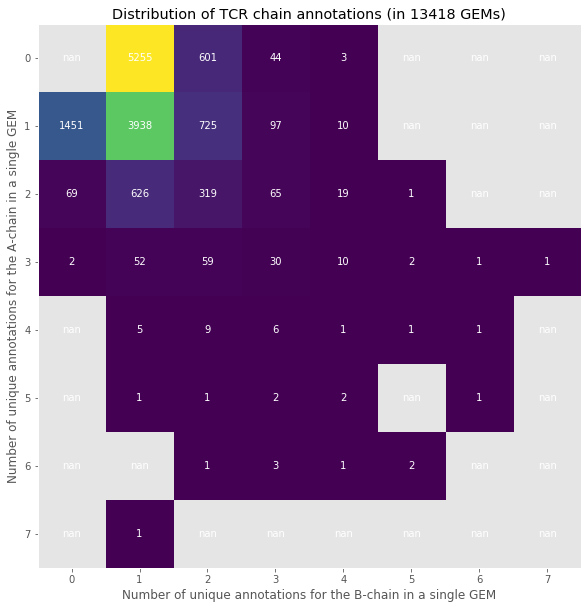

In [14]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False

matrix = cln_df.fillna(0).groupby(['chain_count_TRA','chain_count_TRB']).gem.size().to_frame().reset_index().pivot(index='chain_count_TRA', columns='chain_count_TRB', values='gem')

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(matrix, interpolation='nearest')

# Loop over data dimensions and create text annotations.
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, "%.f" %matrix.iloc[i, j],
                       ha="center", va="center", color="w")

ax.set_xticks(np.arange(matrix.shape[1]))
ax.set_yticks(np.arange(matrix.shape[0]))
       
ax.set_xticklabels(np.arange(0,matrix.shape[1]+1))
ax.set_yticklabels(np.arange(0,matrix.shape[0]+1))

# HACK: with matplotlib==3.1.1 the yaxis is cropped..?
#ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
ax.set_ylim(sorted((-0.5, matrix.shape[0]-0.5), reverse=True))

plt.xlabel('Number of unique annotations for the B-chain in a single GEM')
plt.ylabel('Number of unique annotations for the A-chain in a single GEM')
plt.title('Distribution of TCR chain annotations (in %i GEMs)' %matrix.sum().sum())

plt.savefig(directory + 'chain_annotations.pdf', bbox_inches='tight')
plt.show()

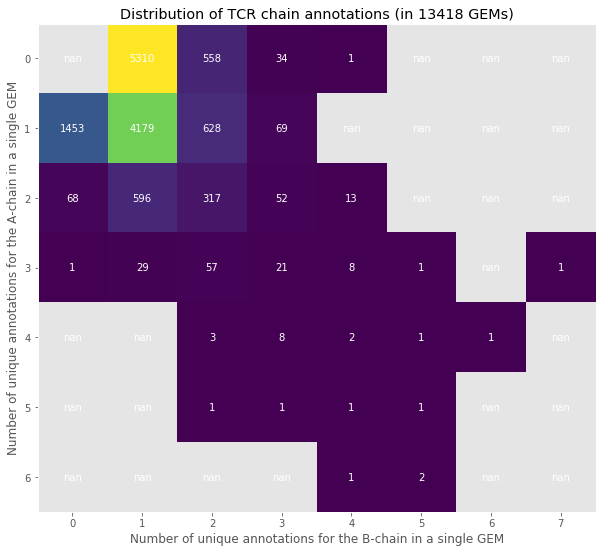

In [15]:
mpl.rcParams['axes.grid'] = False
cln_tmp = cln_df.gem.to_frame()
cln_tmp['chain_count_TRA'] = cln_df.apply(lambda x: len(x.cdr3_lst_TRA) if x.cdr3_lst_TRA[0] != '' else 0, axis=1)
cln_tmp['chain_count_TRB'] = cln_df.apply(lambda x: len(x.cdr3_lst_TRB) if x.cdr3_lst_TRB[0] != '' else 0, axis=1)

matrix = cln_tmp.fillna(0).groupby(['chain_count_TRA','chain_count_TRB']).gem.size().to_frame().reset_index().pivot(index='chain_count_TRA', columns='chain_count_TRB', values='gem')

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(matrix, interpolation='nearest')

# Loop over data dimensions and create text annotations.
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, "%.f" %matrix.iloc[i, j],
                       ha="center", va="center", color="w")

ax.set_xticks(np.arange(matrix.shape[1]))
ax.set_yticks(np.arange(matrix.shape[0]))
       
ax.set_xticklabels(np.arange(0,matrix.shape[1]+1))
ax.set_yticklabels(np.arange(0,matrix.shape[0]+1))

# HACK: with matplotlib==3.1.1 the yaxis is cropped..?
ax.set_ylim(sorted((-0.5, matrix.shape[0]-0.5), reverse=True))

plt.xlabel('Number of unique annotations for the B-chain in a single GEM')
plt.ylabel('Number of unique annotations for the A-chain in a single GEM')
plt.title('Distribution of TCR chain annotations (in %i GEMs)' %matrix.sum().sum())

plt.savefig(directory + 'cln_chain_annotations.pdf', bbox_inches='tight')
plt.show()

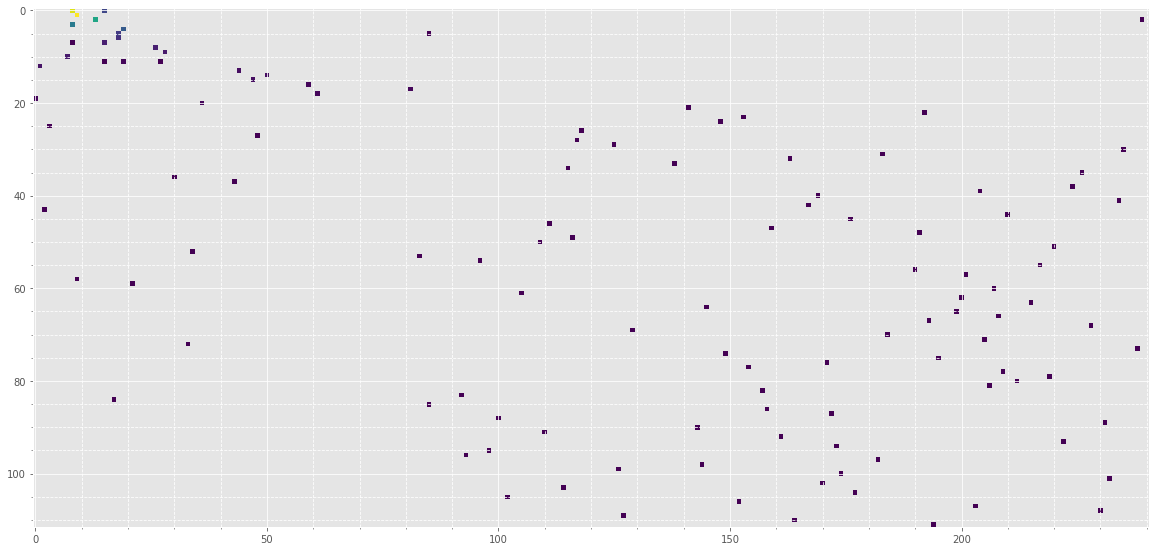

In [50]:
mpl.rcParams['axes.grid'] = 'y'

matrix = cln_df.groupby(['num_clonotype', 'ct']).gem.size().to_frame().reset_index().pivot(index='num_clonotype', columns='ct', values='gem').iloc[1:,:]

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(matrix, interpolation='nearest')

# Loop over data dimensions and create text annotations.
#for i in range(matrix.shape[0]):
#    for j in range(matrix.shape[1]):
#        text = ax.text(j, i, "%.f" %matrix.iloc[i, j],
#                       ha="center", va="center", color="w")
#
#ax.set_xticks(np.arange(matrix.shape[1]))
#ax.set_yticks(np.arange(matrix.shape[0]))
#       
##ax.set_xticklabels(np.arange(0,matrix.shape[1]+1))
##ax.set_yticklabels(np.arange(0,matrix.shape[0]+1))
#
## HACK: with matplotlib==3.1.1 the yaxis is cropped..?
#ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
#
#plt.xlabel('Number of unique annotations for the B-chain in a single GEM')
#plt.ylabel('Number of unique annotations for the A-chain in a single GEM')
#plt.title('Distribution of TCR chain annotations (in %i GEMs)' %matrix.sum().sum())

#plt.savefig(directory + 'chain_annotations.pdf', bbox_inches='tight')
plt.minorticks_on()
plt.grid(b=True, which='minor', linestyle='--')
plt.savefig(directory + 'clonotype_per_ct.pdf')
plt.show()

In [51]:
matrix.count(axis='columns')

num_clonotype
1      2
2      1
3      2
4      1
5      1
      ..
108    1
109    1
110    1
111    1
112    1
Length: 112, dtype: int64

<BarContainer object of 112 artists>

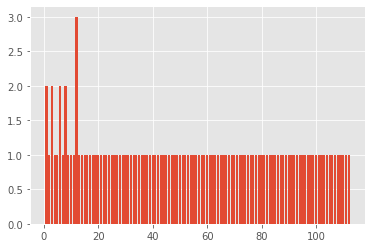

In [52]:
plt.bar(matrix.count(axis='columns').index, matrix.count(axis='columns'))

In [48]:
matrix.fillna(0)

chain_count_TRB,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
chain_count_TRA,,,,,,,,
0.0,0.0,5255.0,601.0,44.0,3.0,0.0,0.0,0.0
1.0,1451.0,3938.0,725.0,97.0,10.0,0.0,0.0,0.0
2.0,69.0,626.0,319.0,65.0,19.0,1.0,0.0,0.0
3.0,2.0,52.0,59.0,30.0,10.0,2.0,1.0,1.0
4.0,0.0,5.0,9.0,6.0,1.0,1.0,1.0,0.0
5.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0
6.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,0.0
7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


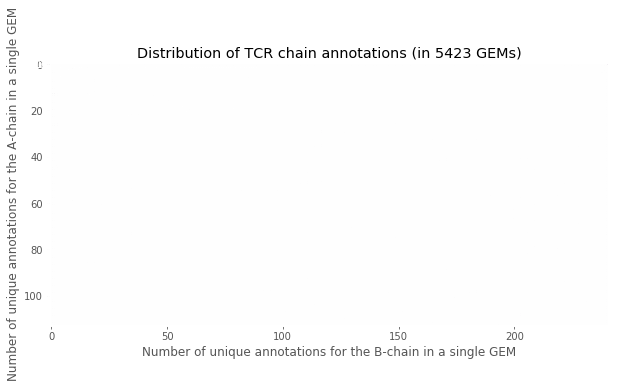

In [23]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False

matrix = cln_df.groupby(['num_clonotype','ct']).gem.size().to_frame().reset_index().pivot(index='num_clonotype', columns='ct', values='gem')

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(matrix, interpolation='nearest')

# Loop over data dimensions and create text annotations.
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, matrix.iloc[i, j],
                       ha="center", va="center", color="w")

#ax.set_xticks(np.arange(matrix.shape[1]))
#ax.set_yticks(np.arange(matrix.shape[0]))
#       
#ax.set_xticklabels(np.arange(0,matrix.shape[1]+1))
#ax.set_yticklabels(np.arange(0,matrix.shape[0]+1))

# HACK: with matplotlib==3.1.1 the yaxis is cropped..?
#ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.xlabel('Number of unique annotations for the B-chain in a single GEM')
plt.ylabel('Number of unique annotations for the A-chain in a single GEM')
plt.title('Distribution of TCR chain annotations (in %i GEMs)' %matrix.sum().sum())

plt.show()

## Write data

In [29]:
cln_df[cln_df.num_clonotype == 1]

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,cdr3_lst_TRA,chain_count_TRA,...,cdr3_TRB,umi_count_TRB,umi_count_lst_TRB,cdr3_lst_TRB,chain_count_TRB,single_TRB,single_chain_only,single_tcell,umi_count_tcr,cdr3_comb
62,AAGGTTCGTCAGGACA-1,clonotype1,1,9,498.0,CALTGGGNKLTF,6.0,[2 6],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,6.0,[6],['CAIRKQDQNTGELFF'],1.0,True,False,True,12.0,CALTGGGNKLTFCAIRKQDQNTGELFF
65,AAGTCTGCACATCTTT-1,clonotype1,1,9,682.0,CALTGGGNKLTF,15.0,[ 1 10 15],['CAASNLVF' 'CVVNNARLMF' 'CALTGGGNKLTF'],3.0,...,CAIRKQDQNTGELFF,31.0,[31],['CAIRKQDQNTGELFF'],1.0,True,False,True,46.0,CALTGGGNKLTFCAIRKQDQNTGELFF
71,AATCCAGTCCGCGTTT-1,clonotype1,1,9,675.0,CALTGGGNKLTF,10.0,[ 6 10],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,13.0,[13],['CAIRKQDQNTGELFF'],1.0,True,False,True,23.0,CALTGGGNKLTFCAIRKQDQNTGELFF
107,ACCAGTAGTGCTGTAT-1,clonotype1,1,9,682.0,CALTGGGNKLTF,14.0,[ 1 6 14],['CALTGGGNKLTF' 'CVVNNARLMF' 'CALTGGGNKLTF'],3.0,...,CAIRKQDQNTGELFF,25.0,[25],['CAIRKQDQNTGELFF'],1.0,True,False,True,39.0,CALTGGGNKLTFCAIRKQDQNTGELFF
163,ACGTCAAGTTATCACG-1,clonotype1,1,9,494.0,CALTGGGNKLTF,9.0,[1 5 9],['CALTGGGNKLTF' 'CVVNNARLMF' 'CALTGGGNKLTF'],3.0,...,CAIRKQDQNTGELFF,37.0,[37],['CAIRKQDQNTGELFF'],1.0,True,False,True,46.0,CALTGGGNKLTFCAIRKQDQNTGELFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,TTAGTTCAGATGAGAG-1,clonotype1,1,9,681.0,CALTGGGNKLTF,14.0,[ 5 14],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,30.0,[30],['CAIRKQDQNTGELFF'],1.0,True,False,True,44.0,CALTGGGNKLTFCAIRKQDQNTGELFF
1664,TTAGTTCCATGTAGTC-1,clonotype1,1,9,680.0,CALTGGGNKLTF,24.0,[11 24],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,43.0,[43],['CAIRKQDQNTGELFF'],1.0,True,False,True,67.0,CALTGGGNKLTFCAIRKQDQNTGELFF
1671,TTCCCAGTCCAAGCCG-1,clonotype1,1,9,494.0,CALTGGGNKLTF,31.0,[11 31],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,84.0,[84],['CAIRKQDQNTGELFF'],1.0,True,False,True,115.0,CALTGGGNKLTFCAIRKQDQNTGELFF
1710,TTGGCAAGTCCCTACT-1,clonotype1,1,9,682.0,CALTGGGNKLTF,24.0,[ 8 24],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,40.0,[40],['CAIRKQDQNTGELFF'],1.0,True,False,True,64.0,CALTGGGNKLTFCAIRKQDQNTGELFF


In [30]:
cln_df[cln_df.num_clonotype == 4]

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,cdr3_lst_TRA,chain_count_TRA,...,cdr3_TRB,umi_count_TRB,umi_count_lst_TRB,cdr3_lst_TRB,chain_count_TRB,single_TRB,single_chain_only,single_tcell,umi_count_tcr,cdr3_comb
46,AACTTTCAGACTAGGC-1,clonotype4,4,9,499.0,CALTGGGNKLTF,4.0,[1 4],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,10.0,[ 1 10],['CAIRKQDQNTGELFF' 'CAIRKQDQNTGELFF'],2.0,False,False,False,14.0,CALTGGGNKLTFCAIRKQDQNTGELFF
169,ACTATCTTCGCTTAGA-1,clonotype4,4,9,492.0,CALTGGGNKLTF,2.0,[1 2],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,17.0,[17],['CAIRKQDQNTGELFF'],1.0,True,False,True,19.0,CALTGGGNKLTFCAIRKQDQNTGELFF
204,AGACGTTGTCTAAACC-1,clonotype4,4,9,681.0,CALTGGGNKLTF,5.0,[1 5],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,4.0,[4],['CAIRKQDQNTGELFF'],1.0,True,False,True,9.0,CALTGGGNKLTFCAIRKQDQNTGELFF
241,AGCGGTCCATCGATGT-1,clonotype4,4,9,446.0,CALTGGGNKLTF,1.0,[1],['CALTGGGNKLTF'],1.0,...,CAIRKQDQNTGELFF,14.0,[14],['CAIRKQDQNTGELFF'],1.0,True,False,True,15.0,CALTGGGNKLTFCAIRKQDQNTGELFF
244,AGCGTCGAGAGTACAT-1,clonotype4,4,9,492.0,CALTGGGNKLTF,2.0,[1 2],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,18.0,[18],['CAIRKQDQNTGELFF'],1.0,True,False,True,20.0,CALTGGGNKLTFCAIRKQDQNTGELFF
289,AGTGAGGTCAGTACGT-1,clonotype4,4,9,492.0,CALTGGGNKLTF,1.0,[1 1],['CVVNNARPMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,7.0,[7],['CAIRKQDQNTGELFF'],1.0,True,False,True,8.0,CALTGGGNKLTFCAIRKQDQNTGELFF
380,CAACCAATCTCCAGGG-1,clonotype4,4,9,493.0,CALTGGGNKLTF,9.0,[1 9],['CVVNNARLMF' 'CALTGGGNKLTF'],2.0,...,CAIRKQDQNTGELFF,22.0,[22],['CAIRKQDQNTGELFF'],1.0,True,False,True,31.0,CALTGGGNKLTFCAIRKQDQNTGELFF
408,CACACTCAGTCAATAG-1,clonotype4,4,9,489.0,CALTGGGNKLTF,2.0,[2],['CALTGGGNKLTF'],1.0,...,CAIRKQDQNTGELFF,5.0,[5],['CAIRKQDQNTGELFF'],1.0,True,False,True,7.0,CALTGGGNKLTFCAIRKQDQNTGELFF
433,CACCAGGCAATCTACG-1,clonotype4,4,9,708.0,CALTGGGNKLTF,14.0,[14],['CALTGGGNKLTF'],1.0,...,CAIRKQDQNTGELFF,44.0,[44],['CAIRKQDQNTGELFF'],1.0,True,False,True,58.0,CALTGGGNKLTFCAIRKQDQNTGELFF
507,CATCGGGCAGGACCCT-1,clonotype4,4,9,503.0,CALTGGGNKLTF,5.0,[5],['CALTGGGNKLTF'],1.0,...,CAIRKQDQNTGELFF,8.0,[8],['CAIRKQDQNTGELFF'],1.0,True,False,True,13.0,CALTGGGNKLTFCAIRKQDQNTGELFF
